## Problem Statement:

The notebook focuses on using Pandas and exploring EDA techniques for analysis.
The goal is to predict the average price of Avocado using various features such as total bags, date, type, year, and region.


The dataset includes categorical, date, and numerical variables.
- Categorical variables : 'type', 'region'
- Date : 'Date'
- Numerical variables :'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', and 'year'.
- Target variable :'AveragePrice'.

### Data Loading and Description
This data was downloaded and provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.Represents weekly 2018 retail scan data for National retail volume (units) and price.

* The dataset comprises of 18249 observations of 14 columns. Below is a table showing names of all the columns and their description.

* The unclear numerical variables terminology is explained in the next section:

| Features |Description|
| --- |--- |
| Unamed: 0      |Its just a useless index feature that will be removed later|
| Total Volume	 |Total sales volume of avocados|
| 4046	 |Total sales volume of Small/Medium Hass Avocado|
| 4225	 |Total sales volume of Large Hass Avocado|
| 4770	 |Total sales volume of Extra Large Hass Avocado|
| Total Bags|Total number of Bags sold|
| Small Bags|Total number of Small Bags sold|
|Large Bags	|Total number of Large Bags sold|
|XLarge Bags|Total number of XLarge Bags sold|

In [9]:
import pandas as pd
import numpy as np

from model_library import regression_models


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from genie_eda import apply_eda

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

## Loading the dataset:

In [10]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Data Preprocessing:

Exploratory Data Analysis (EDA) is crucial for understanding the distribution and characteristics of your dataset. 
It helps identify patterns, outliers, and relationships between variables. 
In this specific dataset with **18,249 observations and 14 features**, we need to analyze the data to determine which features
are relevant for predicting the average price of avocados.

In [31]:
df.dtypes

AveragePrice               float64
4046                       float64
4225                       float64
4770                       float64
Small Bags                 float64
                            ...   
region_Syracuse            float64
region_Tampa               float64
region_TotalUS             float64
region_West                float64
region_WestTexNewMexico    float64
Length: 61, dtype: object

   - Let's perform further steps of the EDA by importing the apply_eda function

DataFrame shape:
(18249, 9) 
 

Checking for null values:
Total Null values count: 0
before update    AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0          1.33  1036.74   54454.85   48.16     8603.62       93.25   
1          1.35   674.28   44638.81   58.33     9408.07       97.49   
2          0.93   794.70  109149.67  130.50     8042.21      103.14   
3          1.08  1132.00   71976.41   72.58     5677.40      133.76   
4          1.28   941.48   43838.39   75.78     5986.26      197.69   

   XLarge Bags          type  region  
0          0.0  conventional  Albany  
1          0.0  conventional  Albany  
2          0.0  conventional  Albany  
3          0.0  conventional  Albany  
4          0.0  conventional  Albany  
after update    AveragePrice     4046       4225    4770  Small Bags  Large Bags  \
0          1.33  1036.74   54454.85   48.16     8603.62       93.25   
1          1.35   674.28   44638.81   58.33     9408.07       97.49   
2          0.9

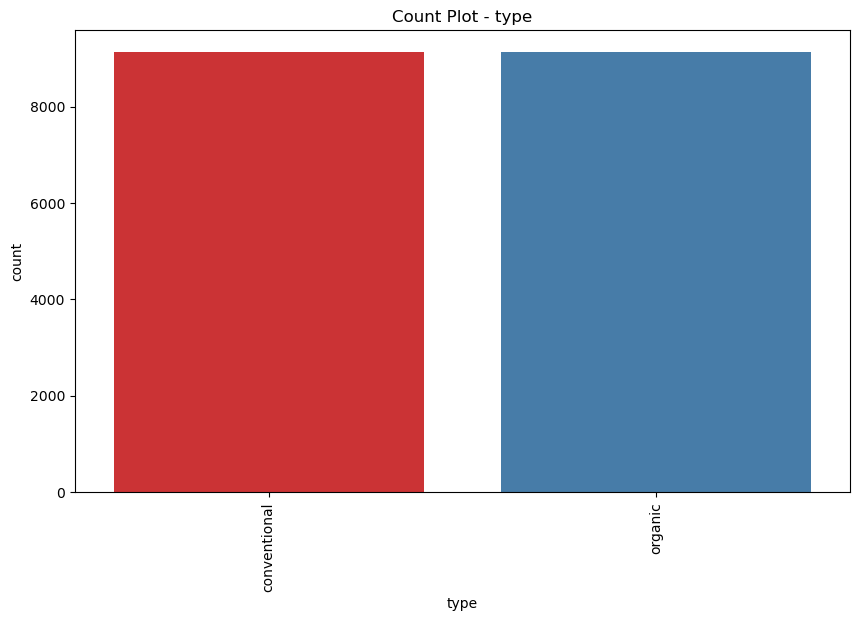

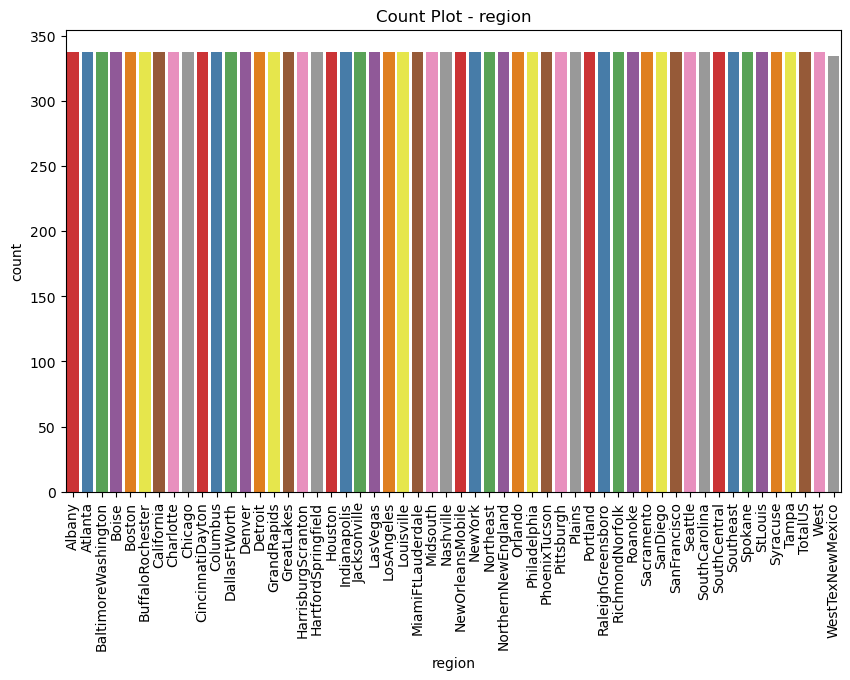

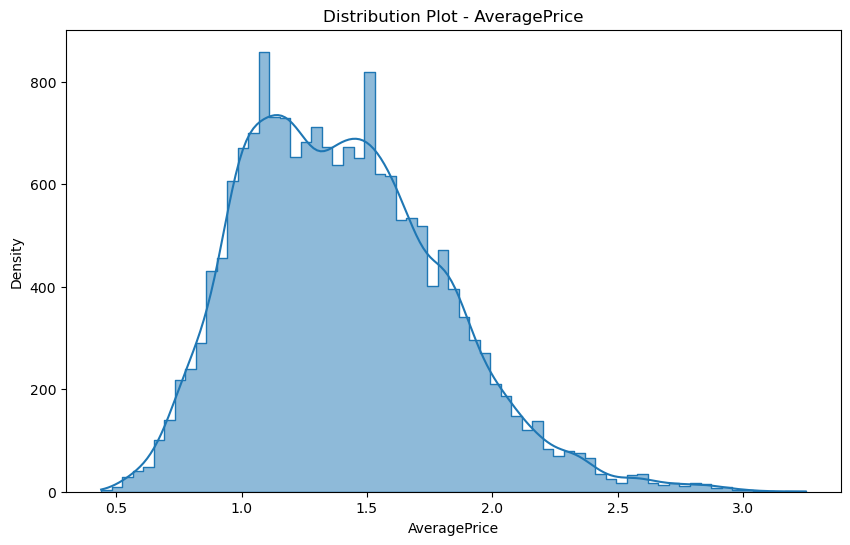

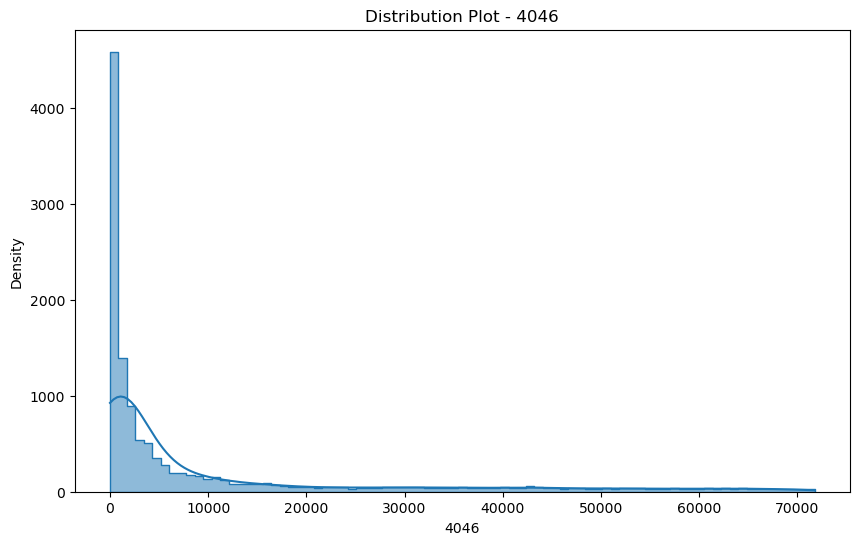

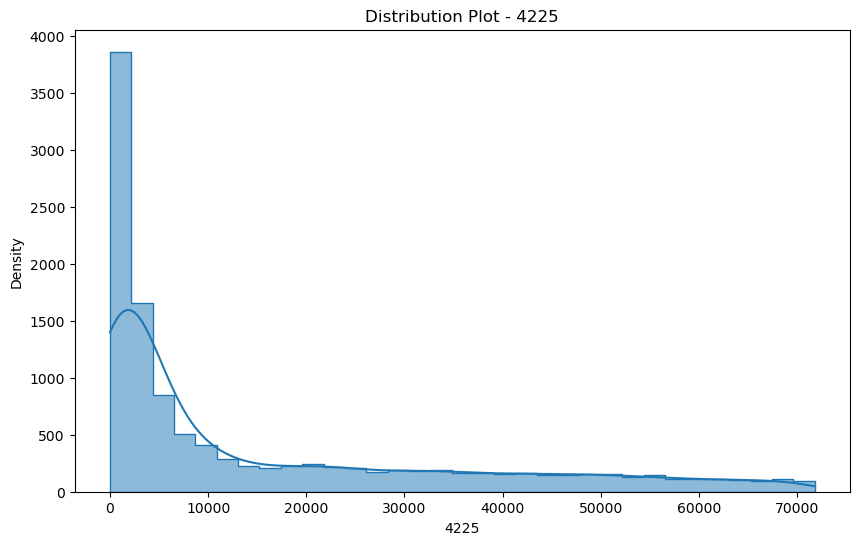

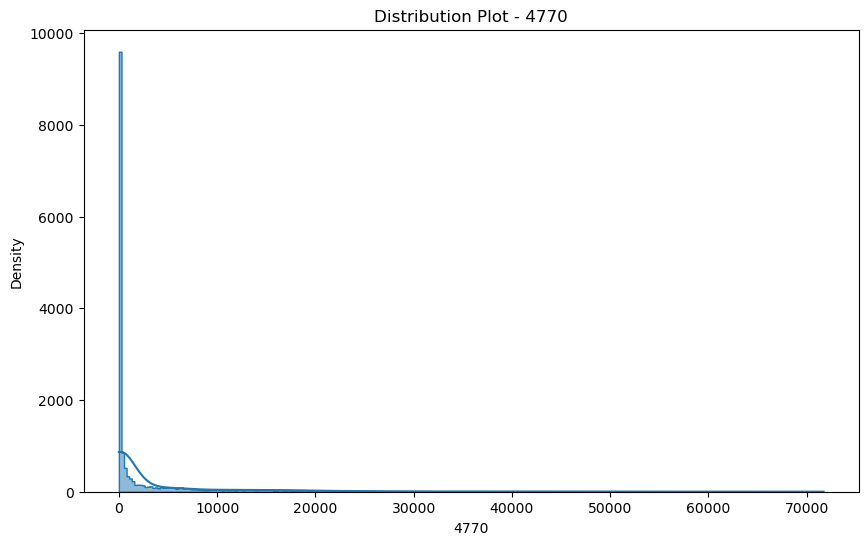

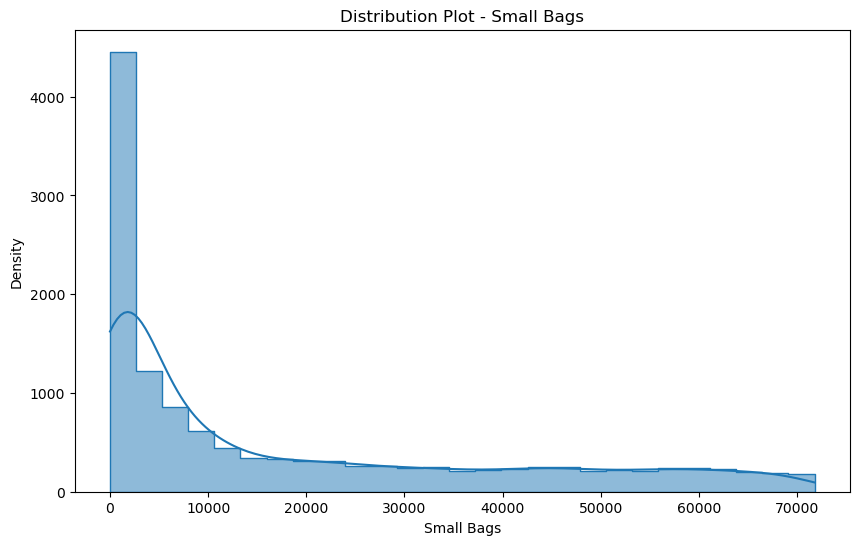

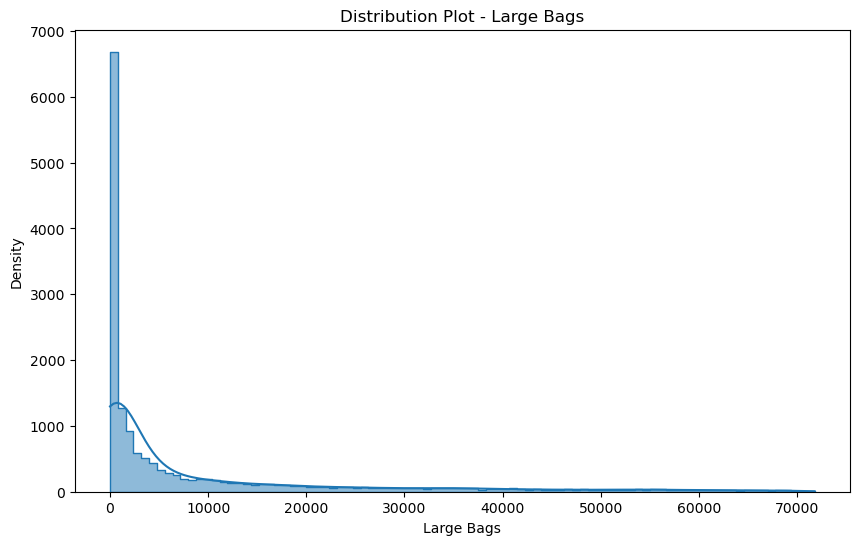

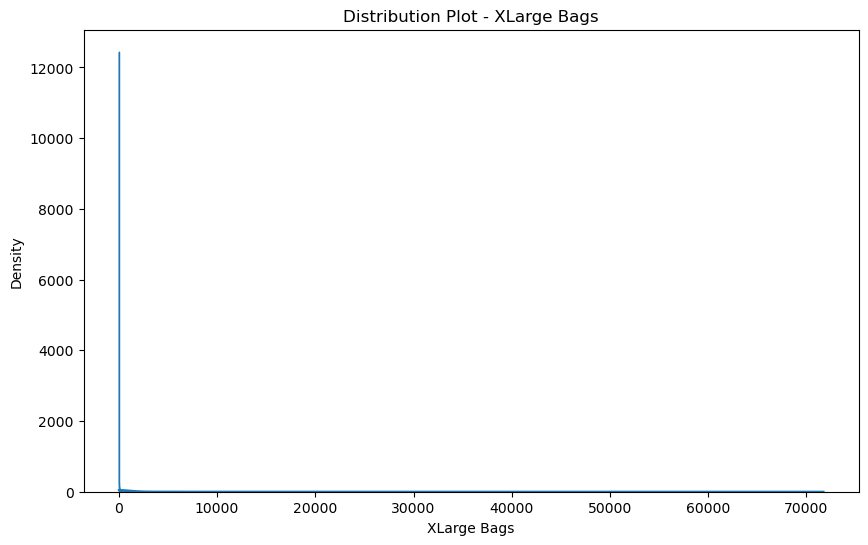

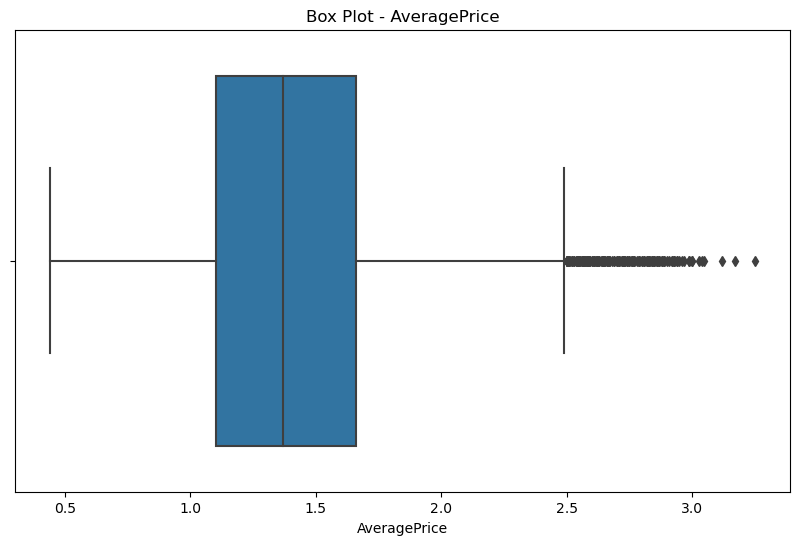

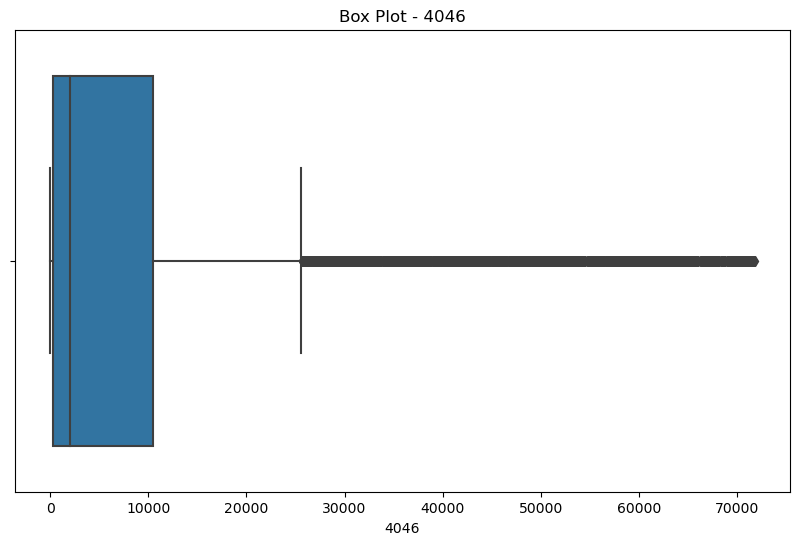

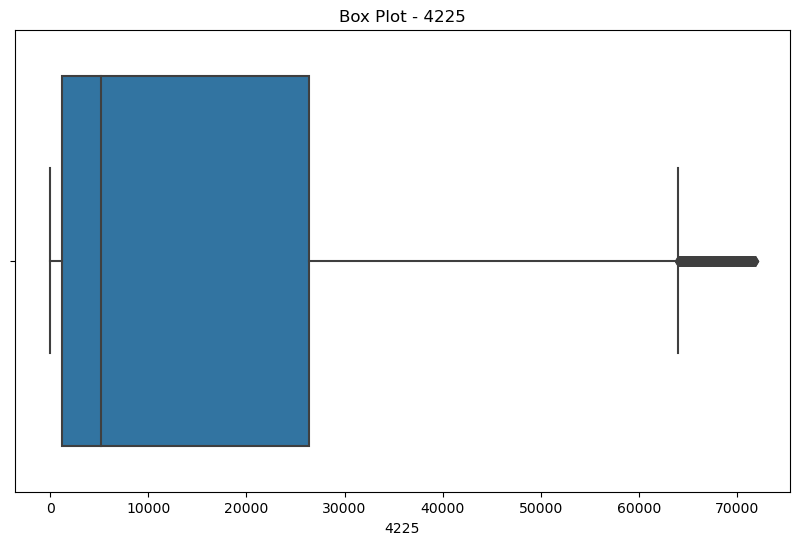

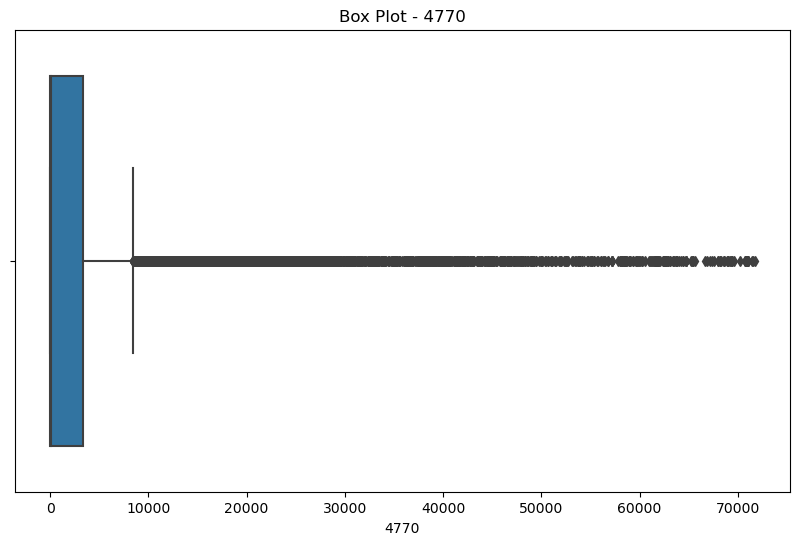

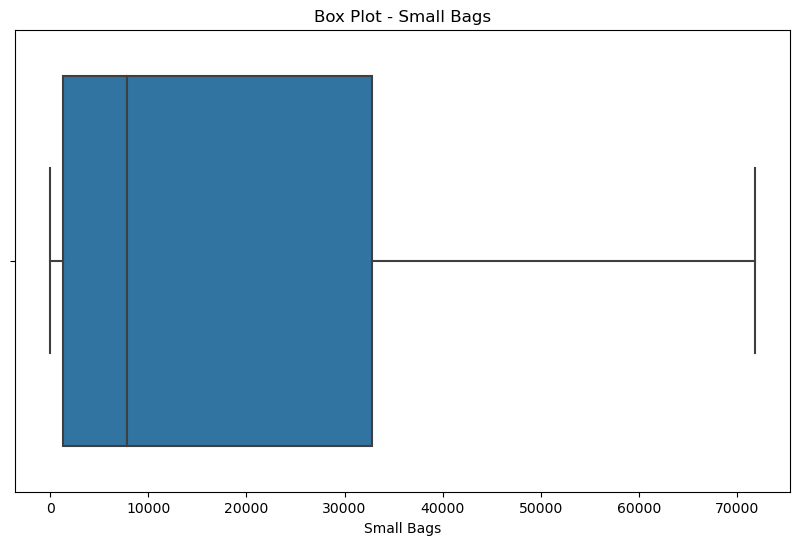

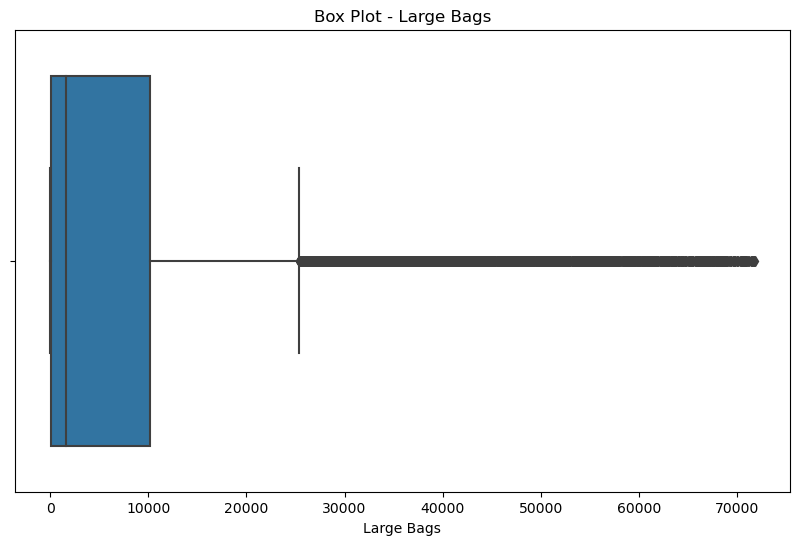

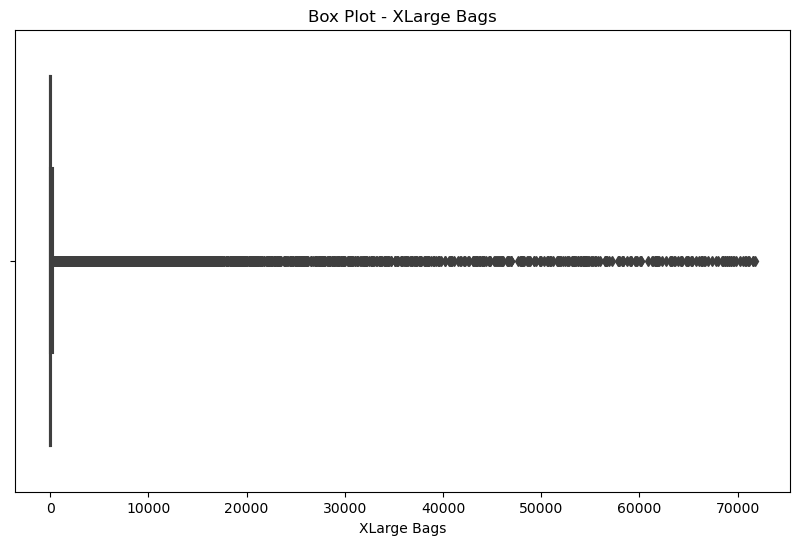

In [13]:
df = apply_eda(df,drop_null='no',fill_null='mean',columns_to_drop=['Unnamed: 0','Date','Total Volume','year','Total Bags'])


As we can see, there are a lot of outliers in the columns "4046", "4770", "Large Bags", and "XLarge Bags" in the avocado dataset. These outliers indicate that there are extreme values that deviate significantly from the majority of the data points in these columns. It is important to identify and handle these outliers appropriately during data analysis and modeling to ensure they do not unduly influence the results or distort the distribution of the data

In [14]:
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,region_Albany,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,794.70,NaN,130.50,8042.21,103.14,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,1132.00,NaN,72.58,5677.40,133.76,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df = df.dropna()

In [16]:
df.shape

(9984, 63)

In [17]:
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,region_Albany,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.26,1184.27,48067.99,43.61,6556.47,127.44,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.07,842.40,64757.44,113.00,8061.47,564.45,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- After the initial preprocessing, the null values have been imputed and outliers have been dropped.
- Also, the categorical columns have been One hot encoded. 

In [19]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic,region_Albany,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
count,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,...,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.0,9984.00000,9984.000000
mean,1.599698,6684.843996,11733.926993,911.551113,10848.913955,3781.323217,89.145657,0.154046,0.845954,0.024539,...,0.016927,0.010617,0.016026,0.033454,0.022536,0.033654,0.016927,0.0,0.00611,0.016627
std,0.382396,13486.888116,17103.370399,4469.106500,15492.014141,8326.841693,691.842197,0.361011,0.361011,0.154724,...,0.129005,0.102495,0.125580,0.179827,0.148426,0.180346,0.129005,0.0,0.07793,0.127874
min,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
25%,1.340000,200.977500,835.517500,0.000000,889.930000,4.887500,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
50%,1.580000,1109.225000,3561.355000,0.000000,3635.615000,428.045000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
75%,1.830000,5162.070000,15003.235000,110.257500,13698.802500,3183.125000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
max,3.250000,71743.110000,71781.920000,69417.880000,71408.880000,71205.040000,16905.280000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000



- The column "XLarge Bags" contains a significant number of null values, with approximately 75% of the data missing. 
- Due to the lack of available data, this feature may not provide meaningful insights or contribute to the 
  prediction of the average price accurately. So, dropping that column.

In [20]:
df = df.drop(columns=['XLarge Bags','type_conventional'])

In [21]:
df.isna().sum()

AveragePrice               0
4046                       0
4225                       0
4770                       0
Small Bags                 0
                          ..
region_Syracuse            0
region_Tampa               0
region_TotalUS             0
region_West                0
region_WestTexNewMexico    0
Length: 61, dtype: int64


- We have certain null values, due to the removal of extreme outliers. 
- These null values need to be removed to ensure the integrity and completeness of the data for further analysis and inference. 
- By removing these null values, we can avoid potential biases and inaccuracies in the analysis results and draw more reliable conclusions from the dataset.

In [28]:
df = df.dropna()
df.shape

(9984, 61)


- After dropping the values, the observations have become 9984 and 61 features.

In [23]:
y = df.AveragePrice
X = df.drop(columns=['AveragePrice'])

## Model Selection/ Model Prediction:

**Label** : AveragePrice.

**Features** : All the columns except the AveragePrice.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
X_train.shape,y_train.shape

((6988, 60), (6988,))

In [26]:
X_test.shape,y_test.shape

((2996, 60), (2996,))

We can evaluate the performance of three regression models:

- Linear Regression
- KNN Regression
- Decision Tree Regression 

To assess their effectiveness, we will consider two important metrics:

- Mean Absolute Percentage Error (MAPE)  
- Mean Squared Error (MSE).

We use the regrssion_models library to understand the performance of each model:


In [27]:
regression_models(X, y, max_depth=None, leaf_nodes=2, n_neighbors=5)

Training Logistic Regression...

Training KNN Regression...

Training Decision Tree Regression...



,Name,Train,Test
0,Linear Regression_MAPE,0.140794,0.141419
1,Linear Regression_MSE,0.079598,0.080832
2,KNN_MAPE,0.072027,0.090337
3,KNN_MSE,0.026159,0.039347
4,Decision_Tree_MAPE,0.029108,0.118279
5,Decision_Tree_MSE,0.005513,0.071418


# 